In [1]:
import pandas as pd

In [2]:
sales = pd.read_csv('Data After Milestone 1.csv' ,encoding='latin-1')

In [3]:
sales['Sales'].value_counts()

Sales
246.490581    5655
12.960000       66
25.920000       50
19.440000       43
32.400000       42
              ... 
2.776000         1
1.860000         1
348.480000       1
1.696000         1
4.302000         1
Name: count, Length: 18703, dtype: int64

In [ ]:
sales.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Month', 'Quarter', 'Year',
       'Day_of_Week', 'Is_Weekend', 'Is_Holiday', 'Season', 'Total_sales',
       'Shipping Time (Days)', 'Promotion_Flag', 'Promotion_Above_Avg', 'Week',
       'Day_of_Month', 'Holiday', 'Order Priority_Encoded',
       'Ship Mode_Encoded', 'Segment_Encoded', 'Market_Encoded',
       'Category_Encoded', 'Sub-Category_Encoded', 'Region_Encoded',
       'Season_Encoded', 'Sales_Lag_1D', 'Sales_Lag_7D', 'Sales_Lag_30D'],
      dtype='object')

In [5]:
# sort the data by order date
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales = sales.sort_values(by='Order Date')


In [6]:
sales = sales.sort_index()

# Create lag features
sales['Sales_Lag_1D'] = sales['Total_sales'].shift(1)   # 1 day before
sales['Sales_Lag_7D'] = sales['Total_sales'].shift(7)   # 1 week before
sales['Sales_Lag_30D'] = sales['Total_sales'].shift(30) # 1 month before

In [7]:
sales[['Sales_Lag_1D','Sales_Lag_7D','Sales_Lag_30D']] = (
    sales[['Sales_Lag_1D','Sales_Lag_7D','Sales_Lag_30D']].fillna(method='bfill')
)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_40476\3862914566.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales[['Sales_Lag_1D','Sales_Lag_7D','Sales_Lag_30D']].fillna(method='bfill')


In [8]:
sales.drop(['Customer Name', 'Product Name','Order Date',
            'Ship Date','Order Priority', 'Ship Mode', 'Segment',
              'Market','Category','Sub-Category', 'Region','Season',
                'City', 'State' ,'Country' ,'Quarter', 'Sales', 'Holiday' ,'Season_Encoded',
                'Region_Encoded','Segment_Encoded','Promotion_Above_Avg'

                ] ,axis=1 ,inplace=True)

In [9]:
sales.columns

Index(['Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Month', 'Year',
       'Day_of_Week', 'Is_Weekend', 'Is_Holiday', 'Total_sales',
       'Shipping Time (Days)', 'Promotion_Flag', 'Week', 'Day_of_Month',
       'Order Priority_Encoded', 'Ship Mode_Encoded', 'Market_Encoded',
       'Category_Encoded', 'Sub-Category_Encoded', 'Sales_Lag_1D',
       'Sales_Lag_7D', 'Sales_Lag_30D'],
      dtype='object')

In [10]:
sales.head()

,Quantity,Discount,Profit,Shipping Cost,Month,Year,Day_of_Week,Is_Weekend,Is_Holiday,Total_sales,...,Week,Day_of_Month,Order Priority_Encoded,Ship Mode_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D
0,7,0.0,9.24,26.375915,7,2012,1,0,0,16167.550,...,31,31,0,1,6,2,0,16167.550,16167.55,16167.55
1,9,0.1,9.24,26.375915,2,2013,1,0,0,33384.555,...,6,5,0,2,0,0,5,16167.550,16167.55,16167.55
2,9,0.1,9.24,26.375915,10,2013,3,0,0,46576.539,...,42,17,3,0,0,2,13,33384.555,16167.55,16167.55
3,5,0.1,9.24,26.375915,1,2013,0,0,0,14462.550,...,5,28,3,0,4,2,13,46576.539,16167.55,16167.55
4,8,0.0,9.24,26.375915,11,2013,1,0,0,22663.680,...,45,5,0,1,1,2,6,14462.550,16167.55,16167.55


In [11]:
from sklearn.model_selection import train_test_split

X = sales.drop('Total_sales', axis=1)
y = sales['Total_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

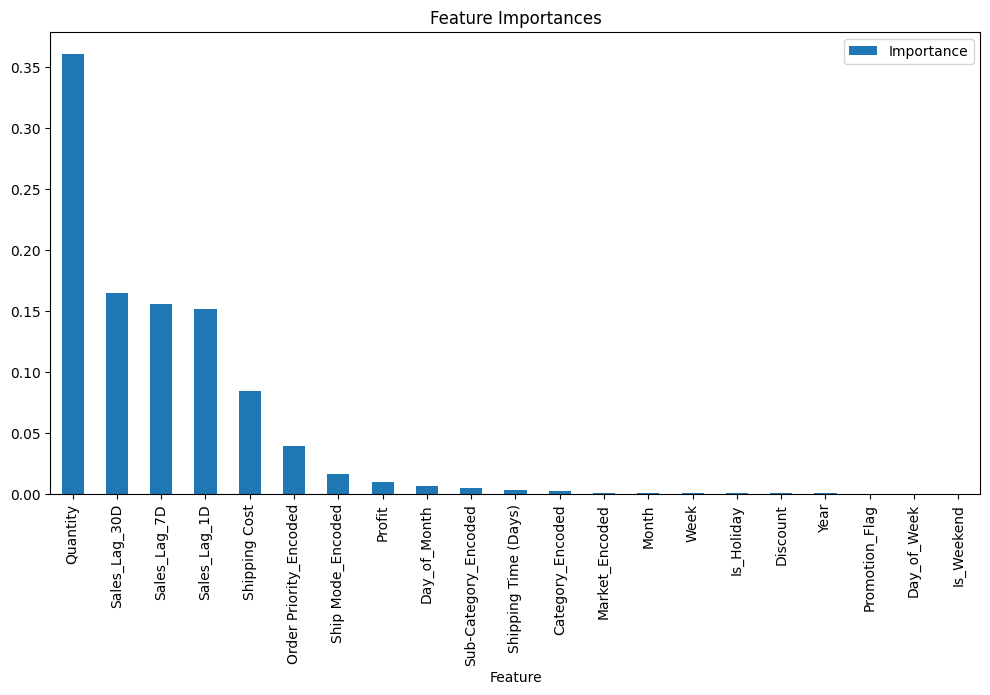

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Recreate and train the model (or assign it if you already trained it earlier)
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)

# Now you can access feature importances
importances = best_model.feature_importances_
features = X_train.columns

import pandas as pd
import matplotlib.pyplot as plt

# Plot
fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df.sort_values(by='Importance', ascending=False).plot(kind='bar', x='Feature', figsize=(12,6))
plt.title('Feature Importances')
plt.show()

In [13]:
sales.head(30)

,Quantity,Discount,Profit,Shipping Cost,Month,Year,Day_of_Week,Is_Weekend,Is_Holiday,Total_sales,...,Week,Day_of_Month,Order Priority_Encoded,Ship Mode_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D
0,7,0.0,9.240,26.375915,7,2012,1,0,0,16167.550,...,31,31,0,1,6,2,0,16167.550,16167.550,16167.55
1,9,0.1,9.240,26.375915,2,2013,1,0,0,33384.555,...,6,5,0,2,0,0,5,16167.550,16167.550,16167.55
2,9,0.1,9.240,26.375915,10,2013,3,0,0,46576.539,...,42,17,3,0,0,2,13,33384.555,16167.550,16167.55
3,5,0.1,9.240,26.375915,1,2013,0,0,0,14462.550,...,5,28,3,0,4,2,13,46576.539,16167.550,16167.55
4,8,0.0,9.240,26.375915,11,2013,1,0,0,22663.680,...,45,5,0,1,1,2,6,14462.550,16167.550,16167.55
5,5,0.1,9.240,26.375915,6,2013,4,0,0,14313.375,...,26,28,0,2,0,2,13,22663.680,16167.550,16167.55
6,4,0.0,9.240,26.375915,11,2011,0,0,0,7288.320,...,45,7,0,0,0,0,5,14313.375,16167.550,16167.55
7,6,0.0,9.240,26.375915,4,2012,5,1,0,31469.040,...,15,14,1,3,0,0,16,7288.320,16167.550,16167.55
8,5,0.2,9.240,26.375915,10,2014,1,0,0,25419.800,...,42,14,2,3,6,1,3,31469.040,33384.555,16167.55
9,13,0.4,9.240,26.375915,1,2012,5,1,0,55869.372,...,4,28,0,2,6,0,16,25419.800,46576.539,16167.55


In [14]:
sales['Shipping Cost'].value_counts()

Shipping Cost
26.375915    5909
0.860000       76
0.710000       75
1.260000       75
1.360000       74
             ... 
56.980000       1
56.990000       1
57.010000       1
57.040000       1
57.050000       1
Name: count, Length: 5218, dtype: int64

In [15]:
X_train.describe()

,Quantity,Discount,Profit,Shipping Cost,Month,Year,Day_of_Week,Is_Weekend,Is_Holiday,Shipping Time (Days),...,Week,Day_of_Month,Order Priority_Encoded,Ship Mode_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D
count,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000,...,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000,41032.000000
mean,3.484865,0.089674,12.476422,13.172892,7.527686,2012.777223,2.341685,0.108525,0.034948,3.961932,...,30.693702,15.756873,2.116933,2.251219,3.340076,1.002925,7.504143,1212.811233,1211.558853,1228.283828
std,2.282986,0.148251,23.232939,12.992774,3.299553,1.099148,1.672175,0.311046,0.183651,1.734466,...,14.533699,8.727927,1.081786,1.085693,2.221577,0.624296,4.841227,3407.211304,3474.274181,3539.501422
min,1.000000,0.000000,-55.125000,0.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.556000,0.836000,0.556000
25%,2.000000,0.000000,2.250000,2.620000,5.000000,2012.000000,1.000000,0.000000,0.000000,3.000000,...,20.000000,8.000000,1.000000,2.000000,1.000000,1.000000,3.000000,67.579875,67.392000,66.952500
50%,3.000000,0.000000,9.240000,7.810000,8.000000,2013.000000,2.000000,0.000000,0.000000,4.000000,...,33.000000,16.000000,3.000000,3.000000,4.000000,1.000000,7.000000,248.679000,246.240000,246.396000
75%,5.000000,0.170000,18.600000,24.570000,10.000000,2014.000000,4.000000,0.000000,0.000000,5.000000,...,44.000000,23.000000,3.000000,3.000000,5.000000,1.000000,12.000000,917.440875,908.608000,915.034000
max,14.000000,0.500000,91.995400,57.200000,12.000000,2014.000000,6.000000,1.000000,1.000000,7.000000,...,52.000000,31.000000,3.000000,3.000000,6.000000,2.000000,16.000000,135830.880000,135830.880000,135830.880000


In [ ]:
# using stander scaler for lag features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Sales_Lag_1D','Sales_Lag_7D','Sales_Lag_30D']] = scaler.fit_transform(X_train[['Sales_Lag_1D','Sales_Lag_7D','Sales_Lag_30D']])
X_test[['Sales_Lag_1D','Sales_Lag_7D','Sales_Lag_30D']] = scaler.transform(X_test[['Sales_Lag_1D','Sales_Lag_7D','Sales_Lag_30D']])



In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score 
import numpy as np

# models = {
#     "Linear Regression": LinearRegression(),
#     "Random Forest": RandomForestRegressor(),
#     "Support Vector Regressor": SVR()
# }

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     print(f"{name}:")
#     print("  RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
#     print("  R² Score:", r2_score(y_test, preds))
#     print("--------------")

    


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=30),
    "Extra Trees": ExtraTreesRegressor(random_state=30),
    "Gradient Boosting": GradientBoostingRegressor(random_state=30),
    # "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(random_state=30, verbosity=0)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds_test = model.predict(X_test)
    preds_train = model.predict(X_train)

    # Calculate metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
    mae_test = mean_absolute_error(y_test, preds_test)
    mae_train = mean_absolute_error(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    r2_train = r2_score(y_train, preds_train)

    # Print results
    print(f"{name}:")
    print(f"  Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")
    print(f"  Train MAE:  {mae_train:.4f} | Test MAE:  {mae_test:.4f}")
    print(f"  Train R²:   {r2_train:.4f}   | Test R²:   {r2_test:.4f}")
    print("-" * 50)


Linear Regression:
  Train RMSE: 2535.1101 | Test RMSE: 2438.1793
  Train MAE:  999.8792 | Test MAE:  1000.6436
  Train R²:   0.4631   | Test R²:   0.4920
--------------------------------------------------


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds

K-Nearest Neighbors:
  Train RMSE: 2072.6396 | Test RMSE: 2381.5192
  Train MAE:  577.4461 | Test MAE:  686.1581
  Train R²:   0.6411   | Test R²:   0.5153
--------------------------------------------------
Random Forest:
  Train RMSE: 751.3355 | Test RMSE: 1845.7630
  Train MAE:  178.0767 | Test MAE:  470.5824
  Train R²:   0.9528   | Test R²:   0.7089
--------------------------------------------------
Extra Trees:
  Train RMSE: 0.0000 | Test RMSE: 1836.9859
  Train MAE:  0.0000 | Test MAE:  475.3137
  Train R²:   1.0000   | Test R²:   0.7116
--------------------------------------------------
Gradient Boosting:
  Train RMSE: 1659.9816 | Test RMSE: 1817.9782
  Train MAE:  486.1372 | Test MAE:  518.4084
  Train R²:   0.7698   | Test R²:   0.7176
--------------------------------------------------
XGBoost:
  Train RMSE: 659.3213 | Test RMSE: 1897.0299
  Train MAE:  261.0295 | Test MAE:  495.4013
  Train R²:   0.9637   | Test R²:   0.6925
--------------------------------------------------


In [19]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
gbr = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.8, 1.0]
}



In [20]:
from sklearn.model_selection import GridSearchCV

# Grid search setup
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',  # You can also use 'r2' or 'neg_mean_absolute_error'
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [22]:
# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_gbr = grid_search.best_estimator_

# Evaluate on test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_gbr.predict(X_test)

# Calculate RMSE manually
print("Tuned GBR Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Tuned GBR Test MAE:", mean_absolute_error(y_test, y_pred))
print("Tuned GBR Test R²:", r2_score(y_test, y_pred))


Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Tuned GBR Test RMSE: 1756.2176479101313
Tuned GBR Test MAE: 463.8483878090311
Tuned GBR Test R²: 0.7364259412759693


In [30]:
models = {
    
    
    "Gradient Boosting": GradientBoostingRegressor(learning_rate=0.05, max_depth=5,min_samples_leaf=5, min_samples_split=2, n_estimators=200, subsample=0.8 ,random_state=200),
    # "Support Vector Regressor": SVR(),
    
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds_test = model.predict(X_test)
    preds_train = model.predict(X_train)

    # Calculate metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
    mae_test = mean_absolute_error(y_test, preds_test)
    mae_train = mean_absolute_error(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    r2_train = r2_score(y_train, preds_train)

    # Print results
    print(f"{name}:")
    print(f"  Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")
    print(f"  Train MAE:  {mae_train:.4f} | Test MAE:  {mae_test:.4f}")
    print(f"  Train R²:   {r2_train:.4f}   | Test R²:   {r2_test:.4f}")
    print("-" * 50)


Gradient Boosting:
  Train RMSE: 1360.1878 | Test RMSE: 1768.4556
  Train MAE:  388.0184 | Test MAE:  465.9490
  Train R²:   0.8454   | Test R²:   0.7327
--------------------------------------------------


In [32]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Grid search setup
grid_search = GridSearchCV(
    estimator=xgbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',  # Can use other metrics if needed
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned XGBoost RMSE: {rmse:.2f}")
print(f"Tuned XGBoost MAE: {mae:.2f}")
print(f"Tuned XGBoost R²: {r2:.4f}")

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 1, 'reg_lambda': 2, 'subsample': 0.8}
Tuned XGBoost RMSE: 1780.47
Tuned XGBoost MAE: 459.30
Tuned XGBoost R²: 0.7291


In [33]:
models = {
    
    
    
    "XGBoost": xgb.XGBRegressor(colsample_bytree= 0.8, gamma= 0, learning_rate= 0.05, max_depth= 5, n_estimators= 300, reg_alpha= 1, reg_lambda= 2, subsample= 0.8)
    
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds_test = model.predict(X_test)
    preds_train = model.predict(X_train)

    # Calculate metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
    mae_test = mean_absolute_error(y_test, preds_test)
    mae_train = mean_absolute_error(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    r2_train = r2_score(y_train, preds_train)

    # Print results
    print(f"{name}:")
    print(f"  Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")
    print(f"  Train MAE:  {mae_train:.4f} | Test MAE:  {mae_test:.4f}")
    print(f"  Train R²:   {r2_train:.4f}   | Test R²:   {r2_test:.4f}")
    print("-" * 50)

XGBoost:
  Train RMSE: 1225.1987 | Test RMSE: 1739.8594
  Train MAE:  365.9846 | Test MAE:  457.9560
  Train R²:   0.8746   | Test R²:   0.7413
--------------------------------------------------
